# Multivariate Regression

Let's grab a small little data set of Blue Book car values:

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df.count()

Price       804
Mileage     804
Make        804
Model       804
Trim        804
Type        804
Cylinder    804
Liter       804
Doors       804
Cruise      804
Sound       804
Leather     804
dtype: int64

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()
#notice it ignores categoricals

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


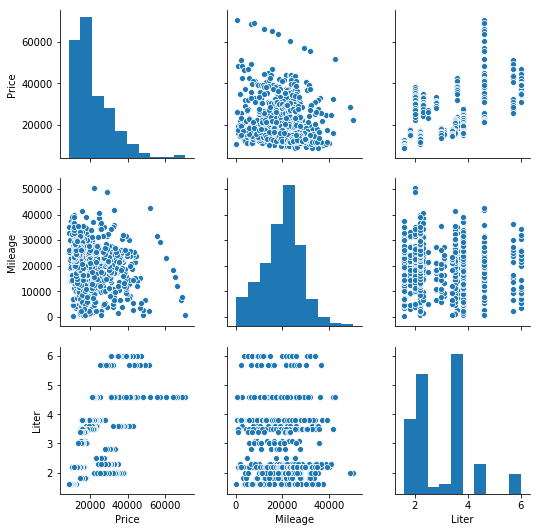

In [5]:
sns.pairplot(df[['Price', 'Mileage', 'Liter']])

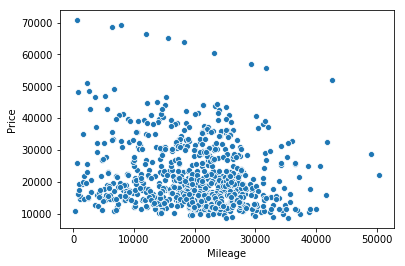

In [6]:
sns.scatterplot(df['Mileage'], df['Price'])

In [13]:
import numpy as np


sns.distplot(arr(df['Mileage']))

NameError: name 'arr' is not defined

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we use pandas.Categorical to convert textual category data (model name) into an ordinal number that we can work with.

### This is actually a questionable thing to do in the real world - doing a regression on categorical data only works well if there is some inherent order to the categories!

In [24]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#scale = StandardScaler()

#convert categorical to mumeric
df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage',  'Model_ord','Doors']]
y = df[['Price']]


# figure out how to scale the values for comparing - not if thats the z score
# print(X)
#X[['Mileage',  'Model_ord','Doors']] = scale.fit_transform(X[['Mileage',  'Model_ord','Doors']].values())


X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()

     Mileage  Model_ord  Doors
0       8221         10      4
1       9135         10      4
2      13196         10      4
3      16342         10      4
4      19832         10      4
5      22236         10      4
6      22576         10      4
7      22964         10      4
8      24021         10      4
9      27325         10      4
10     10237         22      4
11     15066         22      4
12     16633         22      4
13     19800         22      4
14     23359         22      4
15     23765         22      4
16     24008         22      4
17     26034         22      4
18     32896         22      4
19     34665         22      4
20      8970         22      4
21     10577         22      4
22     14363         22      4
23     16508         22      4
24     18908         22      4
25     19467         22      4
26     21394         22      4
27     22596         22      4
28     24469         22      4
29     25245         22      4
..       ...        ...    ...
774    1

TypeError: 'numpy.ndarray' object is not callable

In [18]:
y.groupby(df.Model_ord).mean()

,Price
Model_ord,
0,24960.948265
1,29047.756011
2,30429.581085
3,30023.924244
4,28184.822515
5,10752.833305
6,20896.373454
7,45022.924436
8,30455.144774


Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?